# Difracción de Fraunhofer 

La difracción es la tendencia de toda onda a apartarse de la propagación rectilínea mientras se propaga o pasa a través de una apertura u obstáculo.

Este efecto es básicamente resultado de procesos interferenciales y por lo tanto está íntimamente relacionado con la naturaleza ondulatoria de la luz. 

Para su estudio vamos a basarnos en el **Principio de Huygens-Fresnel**, el cual es necesario destacar que se trata de una aproximación. Para un tratamiento completo de la difracción debemos acudir a las ecuaciones de Maxwell. Sin embargo, el uso del principo de Huygens-Fresnel nos dará resultados más que suficientes. Dicho principio dice lo siguiente:

<div class="alert alert-block alert-info">

*Cada punto del frente de onda se puede suponer como centro secundario emisor de ondas esféricas. La perturbación total que llega a otro punto posterior es el resultado de la interferencia de todas esas ondas secundarias.*
    
</div>

Vamos a considerar la siguiente situación: Una onda esférica monocromática procedente de un punto $P_0$ llega a una apertura que denotaremos por $\Sigma$. Queremos ver cuál es la onda que llega a un punto $P$ situado tras la apertura.
<center>
    
![Dif. General](generaldiff.png)
    
</center>

El campo eléctrico en la apertura será el debido a la onda esférica incidente, 

$$E = \frac{E_0}{r} e^{i k r}$$

Ahora para calcular el campo eléctrico en $P$, primero consideramos cada elemento de superficie $d\Sigma$ de la apertura como un centro emisor de ondas esféricas, y después sumaremos (o dicho de otro modo, haremos interferir) las contribuciones de todos los elementos de superficie para obtener el campo eléctrico total . La contribución individual del elemento de superficie $d\Sigma$ al campo total en $P$ será,

$$dE_p = \frac{E_0}{r} e^{i k r} \frac{e^{i k s}}{s} d\Sigma$$

En la expresión anterior hemos simplemente escrito una onda esférica que se propaga una distancia $s$ (de ahí el término $\frac{e^{i k s}}{s}$. Como la excitación de esta onda es debida a otra onda esférica incidente, su amplitud será $\frac{E_0}{r} e^{i k r} d\Sigma$, es decir, proporcional al elemento de superficie escogido.

Ahora, el campo total lo calcularemos sumando todas las contribuciones de los elementos de superficie distribuidos por toda apertura. Es decir, 

$$E_p = \int_{\Sigma} \frac{E_0}{r s} e^{i k (r + s)} d\Sigma$$

Resolver la anterior integral dependerá de la forma de la apertura, y de las distancia $s$ y $r$ entre la apertura y el punto $P$ en el que queremos calcular el campo y el punto $P_0$ fuente de la onda esférica incidente en la apertura. Nosotros no vamos a ver el cálculo general, sino que **nos vamos a centrar en la aproximación conocida como régimen (o difracción) de Fraunhofer**. Esta aproximación se corresponde con que la fuente $P_0$ y el punto de observación $P$ estén lo suficientemente alejados de la apertura. A partir de ahora nos referiremos a los puntos $P$ y $P_0$ por sus coordenadas cartesianas tomando como origen el plano de la apertura,las cuales llamaremos $(x,y,z)$ y $(x_0,y_0,z_0)$ respectivamente. Además, las coordenadas de un punto en la apertura las denotaremos por $(\chi, \eta)$. 

Podemos demostrar que **el régimen de Fraunhofer lo podemos obtener cuando se cumple**, 

$$min(z,z_0) > \frac{a^2}{\lambda}$$

donde en la expresión anterior, $z$ es la distancia entre la apertura y $P$, $z_0$ la distancia entre $P_0$ y la apertura, $a$ es la dimensión de la apertura, y finalmente $\lambda$ es la longitud de onda de la luz.

Una forma de satisfacer el anterior requisito es situar la fuente $P_0$ y el punto de observación $P$ en el infinito de forma efectiva, es decir, en los planos focales de dos lentes situadas a ambos lados de la apertura.

Bajo esta condición, se puede demostrar que el campo resultante en $P$ viene dado por la siguiente expresión, 

$$E_P = C \int_{\Sigma} E_0(\chi, \eta) e^{i k (p \chi + q \eta)} d\chi d\eta$$

donde recordamos que $\chi, \eta$ son las variables cartesianas en el plano de la apertura (estamos sumando todas las contribuciones de los elementos de superficie en los que dividimos la apertura). Además, 
$$p = \frac{x_0}{z_0} + \frac{x}{z}$$
y
$$q = \frac{y_0}{z_0} + \frac{y}{z}$$

**La expresión de $E_P$ escrita de la manera anterior no es nada más que la transformada de Fourier del campo en la apertura $E_0(\chi, \eta)$**. Si la apertura tiene una cierta transmitancia $t(\chi,\eta)$, el campo inmediatamente después será $t(\chi, \eta)E_0(\chi,\eta)$ y será este producto el que tengamos que introducir en la expresión de $E_P$.

## Abertura rectangular.

<center>

![difrendija](./difraccionrendijafig.png)

</center>

En este caso, haciendo la integral anterior, el campo  resultante en $P$ que se obtiene es, 

$$E_P(\theta) = E_0 \frac{sen(\beta)}{\beta} e^{i(k r_0 - \omega t)}$$

y la irradiancia, 
<div class="alert alert-block alert-success">

$$I_P(\theta) = I_0 (\frac{sen(\beta)}{\beta})^2 $$
    
</div>

donde en las anteriores expresiones, $\beta = k a sen(\theta) / 2$. Es decir, la  irradiancia únicamente depende del ángulo $\theta$ que subtiende $P$ visto desde el centro de la apertura. 

En el caso en el que el punto $P$ esté en el plano focal de una lente con focal $f'$, $sen(\theta) \simeq y_P / f'$ para ángulos pequeños y $\beta = k a y_P / 2 f'$  Si por el contrario, observamos en una pantalla a una distancia $D$ mucho mayor que el tamaño de la apertura, $\beta = ka y_P /2 D$.

Veamos qué forma tiene la anterior función. Para observar los cambios en la irradiancia con la anchura de la rendija u otros parámetros, se pueden modificar los parámetros del código que se presenta a continuación.

In [1]:
from numpy import *
from matplotlib.pyplot import *
import ipywidgets as widgets
%matplotlib inline
style.use('bmh')



yp = linspace(-20,20,500) # vector de posiciones en la pantalla en mm
I0 = 1 # en mW/cm^2
[X,Y] = meshgrid(yp,yp)

def difraccion(focal,a,Color):
    if(Color=='Azul (400nm)'):
        Lambda = 4e-4
        cmapchosen = 'Blues'
    elif(Color=='Verde (550 nm)'):
        Lambda = 5.5e-4
        cmapchosen = 'Greens'
    elif(Color=='Rojo (650 nm)'):
        Lambda = 6.5e-4
        cmapchosen = 'Reds'
    
    k = 2.0*pi/Lambda
    beta = k*a*yp/(2.0*focal)
    IP = I0*(sin(beta)/beta)**2

    # En 2D
    beta2 = k*a*X/(2.0*focal)
    IP2 = I0*(sin(beta2)/beta2)**2
    fig = figure(figsize=(16,5))
    subplot(121)
    plot(yp,IP)
    xlabel("y_P (mm)")
    ylabel(r'I$_0$')
    subplot(122)
    grid(False)
    pcolormesh(yp,yp,IP2,cmap = 'hot');
print('Tanto la focal como la anchura de la rendija a se expresan en mm')

lambdawidgets = widgets.Dropdown(options=['Azul (400nm)','Verde (550 nm)','Rojo (650 nm)'])
lambdawidgets.height = 30
widgets.interact(difraccion,focal=(300,700,50),a=(0.01,0.2,0.03),Color=lambdawidgets)#widgets.fixed(5.5e-7))


Tanto la focal como la anchura de la rendija a se expresan en mm


interactive(children=(IntSlider(value=500, description='focal', max=700, min=300, step=50), FloatSlider(value=…

<function __main__.difraccion(focal, a, Color)>

### Mínimos de irradiancia

Lo que observamos en la figura superior es que aparece un máximo central muy pronunciado y unos máximos y mínimos laterales, cuyo espaciado depende de la anchura de la rendija. Veamos cuales son las posiciones de los mínimos de irradiancia.Atendiendo a la expresion de la irradiancia en la pantalla, los mínimos ocurriran en las posiciones que hagan nulo el numerador, es decir, cuando,

$$\sin(k a y_P/2D) = 0 \Rightarrow \frac{k a y_P}{2D} = m \pi \;\; rad$$

donde en la anterior expresion se ha supuesto que observamos el patron de irradiancia en una pantalla situada a una distancia $D$ de la rendija. Despejando $y_P$ obtendremos las posiciones en la pantalla (distancia al eje) que hacen nula la irradiancia. Estas distancias seran, 

$$y_P^{min} = \frac{m \lambda D}{a} $$

En esta expresion hay que analizar en detalle que ocurre cuando $m = 0$. En este caso, el seno efectivamente es nulo,pero tambien lo es el denominador de la expresion de $I_P$, por lo que tenemos una indeterminacion. Si la resolvemos, observamos que la irradiancia en ese punto no es nula (minima) sino maxima. Es mas, es el máximo central mas alto de todos. Por tanto, las posiciones de los mínimos hay que encontrarlas para $m = \pm 1, \pm 2, \pm 3 \ldots$.

Hemos comentado anteriormente que la difracción de Fraunhofer no era más que la transformada de Fourier del campo en la apertura (mejor dicho, el campo es proporcional a la transformada de Fourier). Veamos esto. 

En el código que se presenta a continuación se calcula un campo en la apertura. Como suponemos que llega una onda plana, el campo en la apertura será nada más que un valor constante para los puntos dentro de la apertura y nulo en los puntos fuera de la apertura. En el código a este campo se le denomina *campoinc*. Posteriormente, el código usa la función *fft* estándar para calcular la transformada de Fourier de ese campo. Finalmente, representamos el cuadrado del valor absoluto de esa transformada, que, deberá ser proporcional a la irradiancia representada anteriormente. 

Podemos ver cómo la función obtenida es igual a la representada anteriormente. Aunque un análisis más detallado debería tener en cuenta la transformación entre las frecuencias utilizadas en el código y los valores de *y* en el plano de observación, no entraremos ahí. Nos basta por el momento con ejemplificar la relación entre la transformada de Fourier y la irradiancia obtenida en el régimen de Fraunhofer.

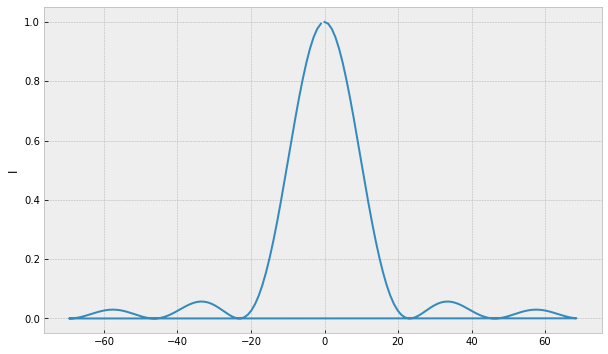

In [2]:
def fun(x):
    if(abs(x)<0.05/2):
        return 1.0
    else:
        return 0.0
    
y = linspace(-0.5,0.5,140)
funvec = vectorize(fun)
campoinc = funvec(y)
from scipy.fftpack import fft, fftfreq
fig = figure(figsize=(10,6))
freq = fftfreq(y.shape[0],y[1]-y[0])
tfcampo = fft(campoinc)
tfcampo2 = abs(tfcampo)**2/max(abs(tfcampo))**2
plot(freq,abs(fft(campoinc))**2/max(abs(fft(campoinc)))**2)
ylabel("I");


## Abertura circular

En el caso de una apertura circular de diámetro $D_a$, la expresión del campo eléctrico en un punto $P$ que subtiende un ángulo $\theta$ con el eje, y bajo la aproximación considerada en el régimen de Fraunhofer es la siguiente, 

$$ E(\theta) = C \frac{J_1(k \frac{D_a}{2} sen(\theta))}{k \frac{D_a}{2} sen(\theta)}$$

y por tanto la irradiancia, 

$$ I(\theta) = I_0 \left(\frac{J_1(k \frac{D_a}{2} sen(\theta))}{k \frac{D_a}{2} sen(\theta)}\right)^2$$

A esta función se le denomina *mancha de Airy* y es fundamental para comprender la formación de la imagen de sistemas ópticos incluyendo la naturaleza ondulatoria de la luz, así como su poder de resolución.

Si observamos el patrón de difracción en una pantalla situada a una distancia $D$ de la apertura, y llamamos $r$ a la distancia del punto de observación $P$ al eje del sistema óptico, tendremos que $tan(\theta) = r/D$. Por otro lado, si consideramos que el ángulo subtendido por el punto $P$ es pequeño, $sen(\theta) \simeq tan(\theta) = r/D$, pudiendo sustituir el seno en las expresiones anteriores por este cociente.

La forma de esta función la podemos ver en la siguiente figura.

In [3]:
from numpy import *
from matplotlib.pyplot import *
import ipywidgets as widgets
%matplotlib inline
style.use('bmh')

from scipy.special import j1

#Parámetros
#############
Da = 0.1 # mm
D = 2000 # distancia entre la apertura y la pantalla de observacion
I0 = 1 #mW/cm^2
############

r = linspace(0.001,50,100)
x = linspace(-50,50,100)
[X,Y] = meshgrid(x,x)
R = sqrt(X**2 + Y**2)
def circ(D,Da,Color):
    if(Color=='Azul (400nm)'):
        Lambda = 4e-4
        cmapchosen = 'Blues'
    elif(Color=='Verde (550 nm)'):
        Lambda = 5.5e-4
        cmapchosen = 'Greens'
    elif(Color=='Rojo (650 nm)'):
        Lambda = 6.5e-4
        cmapchosen = 'Reds'
    
    k = 2.0*pi/Lambda
    
    fig = figure(figsize=(14,7))
    subplot(121)
    Icirc = I0*(j1(k*0.5*Da*r/D)/(k*0.5*Da*r/D))**2
    plot(r,Icirc)
    xlabel("r (mm)")
    ylabel("I (u.a.)");

    #En 2D
   
    Icirc2 =  I0*(j1(k*0.5*Da*R/D)/(k*0.5*Da*R/D))**2
    subplot(122)
    pcolormesh(x,x,Icirc2,cmap='hot')
    xlabel('x (mm)')
    xlim([-50,50])
    ylim([-50,50])
    ylabel('y (mm)')
    return
print('Tanto la focal como el diametro del circulo Da se expresan en mm')

lambdawidgets = widgets.Dropdown(options=['Azul (400nm)','Verde (550 nm)','Rojo (650 nm)'])
lambdawidgets.height = 30
widgets.interact(circ,D=(500,3000,100),Da=(0.05,0.2,0.02),Color=lambdawidgets)#widgets.fixed(5.5e-7))


Tanto la focal como el diametro del circulo Da se expresan en mm


interactive(children=(IntSlider(value=1700, description='D', max=3000, min=500, step=100), FloatSlider(value=0…

<function __main__.circ(D, Da, Color)>

Vemos que tiene simetría circular, y que los máximos secundarios son muchísimo menores en amplitud que el pico central, lo que quiere decir que prácticamente toda la energía se encuentra en el máximo central. Para observar cómo varía la forma de esta función con la dimensión de la apertura, modificar en el anterior código el parámetro $D_a$ y volver a ejecutarlo.


-----

Como se puede observar en la figura superior, los maximos laterales tienen una altura mucho menor que el pico central, o lo que es lo mismo, el primer maximo contiene la mayor parte de la energia del haz. Es por ello que en esta distribucion de irradiancia toma mucha importancia el primer minimo, mas que los minimos de ordenes mas altos. Para hallarlo, tenemos que encontrar el primer minimo de la funcion de Bessel $J_1$ del numerador en la expresion de la irradiancia en la pantalla. Estos minimos los podemos encontrar en cualquier libro de tablas, obteniendo que, 

$$ k \frac{D_a}{2} \sin(\theta) \sim 3.4 \Rightarrow \sin(theta) \simeq \frac{1.22 \lambda}{D_a}$$

Este angulo asi hallado es el angulo que subtiende el primer minimo en la pantalla con el eje del sistema visto desde la apertura circular. Como normalmente es pequeno, tenemos que $\sin(\theta) \sim \theta \sim \tan(\theta) = r_1/D$, donde aqui $r_1$ representa el radio de ese primer anillo oscuro y $D$ la distancia entre la apertura y la pantalla de observacion. Tenemos por tanto, que el radio del primer anillo oscuro, es igual a, 

$$r_1 = \frac{1.22 \lambda D}{D_a}$$

